In [38]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

SyntaxError: ignored

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.006442773698145,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005102583402028,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.00500685241788,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004989589838072,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [9]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

Задача 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). Найти количество уникальных имен.

In [10]:
#Функция для разбиения строки с участниками на список участников
def crew_list_getter(text):
    data = text.split(", ")
    for i in range(len(data)):
        data[i] = data[i].replace('(dir.)', '').strip()
    return data

In [11]:
data['crew_list'] = data.crew.apply(crew_list_getter)
data.head()

,movies,ratings,crew,links,title,year,crew_list
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]"
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]"
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]"
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]"


In [12]:
#Список всех участников (применяем set, чтобы оставить уникальных):
all_crew_list = list(set(data['crew_list'].sum()))

In [13]:
#Количество уникальных имен
len(all_crew_list)

527

Задача 2. Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

In [14]:
#Функция для отбора имени директора из команды
def dir_getter(text):
    data = text.split(", ")
    dir_name = ''
    for i in range(len(data)):
        if data[i].find('(dir.)') != -1:
            dir_name = data[i].replace('(dir.)', '').strip()
    return dir_name

In [15]:
data['director'] = data.crew.apply(dir_getter)
data.head()

,movies,ratings,crew,links,title,year,crew_list,director
0,"[\n 1.\n , [The Shawshank Redemption...",9.235294728575104,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156163976919544,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.98960502345779,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051803301583,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951091683269263,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet


In [16]:
#Получаем список всех директоров
dir_list = list(set(data.director.values))
len(dir_list)

154

Приведем рейтинг к float

In [17]:
data['ratings'] = data['ratings'].astype(float)

Перейдем к графику

In [18]:
#Посчитаем сколько фильмов у каждого директора
dir_top = data[['director']].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


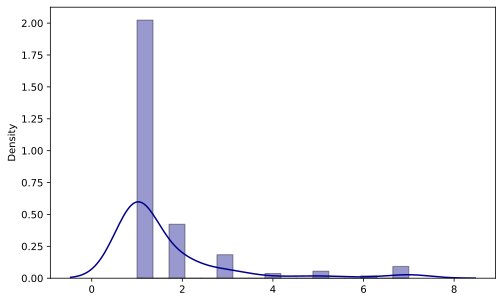

In [19]:
#Построим график распределения по рейтингу
sns.distplot(dir_top, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

Как видно, большинство директоров смогло оказаться в рейтинге лишь единожды.
Хотя некоторые смогли отличиться и попали в него 4, 5 и даже 7 раз

In [20]:
#Найти директора(ов), у которого(ых) больше всего фильмов в топе.
dir_top = dir_top[dir_top.values == dir_top.max()]
dir_top

director         
Martin Scorsese      7
Steven Spielberg     7
Christopher Nolan    7
Stanley Kubrick      7
Akira Kurosawa       7
dtype: int64

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе

In [21]:
#Сделаем датафрейм из списка уникальных имен
task3_df = pd.DataFrame(all_crew_list, columns=['names'])
#Посчитаем, сколько раз каждое имя встречается в списках команд
task3_df['film_count'] = task3_df.names.apply(lambda name: data.crew_list.apply(lambda crew: name in crew).value_counts().loc[True])
task3_df.head()

,names,film_count
0,Irvin Kershner,1
1,Nobuo Kaneko,1
2,Jeff Bridges,1
3,Tim Robbins,1
4,Brad Pitt,4


In [22]:
#выведем Топ
task3_df[task3_df['film_count'] == task3_df.film_count.max()]

,names,film_count
319,Robert De Niro,9


Человек, принявший участие в наибольшем числе топовых фильмов - Robert De Niro

Задача 4. Построить распределение топовых фильмов по годам

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


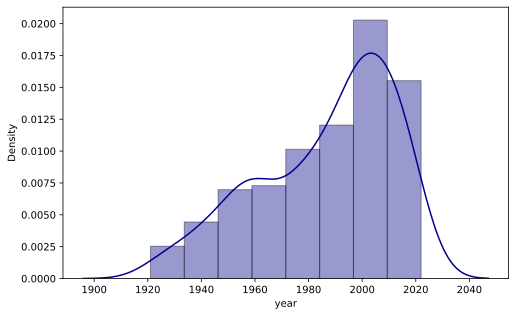

In [23]:
#Построим график распределения по годам
sns.distplot(data['year'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

Как видно, что большая часть топовых фильмов была снята в 2000-2020 годах. 
Также можно сказать, что у более новых фильмов рейтинг выше (за исключением 2010-)

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


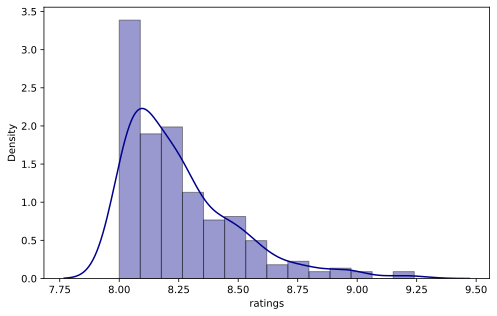

In [24]:
#Построим график распределения по рейтингу
sns.distplot(data['ratings'].round(2), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


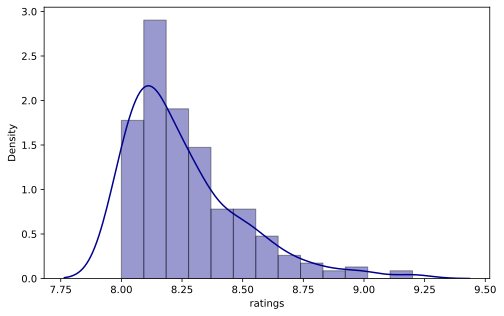

In [25]:
#Построим график распределения по рейтингу
sns.distplot(data['ratings'].round(1), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


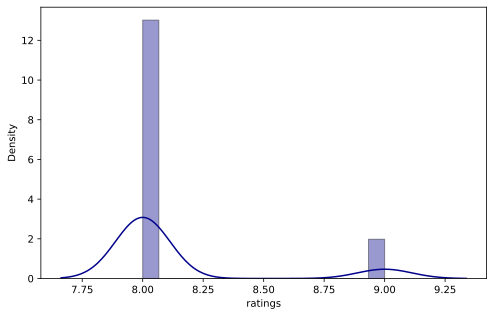

In [26]:
#Построим график распределения по рейтингу
sns.distplot(data['ratings'].round(0), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
            )
plt.show()

Как видно, в топ входят фильмы с рейтингов 8+. По распределению видно, что у большинства фильмов рейтинг в районе 8. По мере увеличения рейтинга число фильмов с соответсвующей оценкой уменьшается.

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [39]:
pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 


In [40]:
#добавляем модуль, чтобы симулировать запросы из браузера
from fake_useragent import UserAgent
import random
from tqdm import tqdm

In [41]:
film_url = 'https://www.imdb.com/title/tt0111161/'
html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text

In [42]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [49]:
descriptions = []
for film_page in tqdm((data['links']).values):
    film_url = 'https://www.imdb.com' + film_page
    html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text
    soup = BeautifulSoup(html_text, 'lxml')
    descriptions.append(soup.find_all(attrs={"name": "description"})[0].get("content"))
    #приостанавливаем запросы на сервер
    time.sleep(0.5 + random.random())

100%|██████████| 250/250 [07:28<00:00,  1.79s/it]


In [52]:
data['description'] = descriptions
data.head()

,movies,ratings,crew,links,title,year,crew_list,director,description
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156164,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989605,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather Part II], ...",8.984052,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951092,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...



Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

In [53]:
#Импортируем библиотеку для парсинга строк
import re

In [54]:
data['description_actors']  = data['description'].apply(lambda text: re.findall('With (.*?)\.', text)[0].split(', ')) 
data.head(5)

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156164,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989605,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,"[\n 4.\n , [The Godfather Part II], ...",8.984052,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober..."
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951092,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...,"[Martin Balsam, John Fiedler, Lee J]"


In [55]:
#Посчитаем, для скольких строк получилось найти актерский состав
data['description_actors'].apply(lambda x: x != []).sum()

250

Для всех:)

Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

In [56]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [57]:
#При парсинге сразу преобразуем строку в число
data['rate_count'] = [int(re.search('on (.*?) user', rate_line.find('strong').attrs.get('title'))[0][3:-5].replace(',', '')) for rate_line in soup.find_all('td', {'class': 'ratingColumn imdbRating'})]
data.head(5)

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors,rate_count
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672223
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156164,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]",1851996
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989605,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2645081
3,"[\n 4.\n , [The Godfather Part II], ...",8.984052,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268074
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951092,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...,"[Martin Balsam, John Fiedler, Lee J]",789296


In [58]:
#топ 10 фильмов по числу оценок
data.sort_values('rate_count', ascending=False)[['title', 'rate_count']].iloc[:10]

,title,rate_count
0,The Shawshank Redemption,2672223
2,The Dark Knight,2645081
13,Inception,2344567
11,Fight Club,2117660
10,Forrest Gump,2072138
7,Pulp Fiction,2047231
15,The Matrix,1908661
8,The Lord of the Rings: The Fellowship of the Ring,1870868
1,The Godfather,1851996
6,The Lord of the Rings: The Return of the King,1841614


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов

In [59]:
marks = r'[\'\"!\(\)-\[\]\{\};\?@#$%:\,\./\^\&\;\*_]'
task9_df = pd.DataFrame()
task9_df['title_word_list'] = data['title'].apply(lambda line: [item for item in list(map(lambda word: re.sub(marks, '', word), line.split())) if item != ''])
task9_df['description_word_list'] = data['description'].apply(lambda line: [item for item in list(map(lambda word: re.sub(marks, '', word), line.split())) if item != ''])
task9_df

,title_word_list,description_word_list
0,"[he, hawshank, edemption]","[he, hawshank, edemption, irected, by, rank, a..."
1,"[he, odfather]","[he, odfather, irected, by, rancis, ord, oppol..."
2,"[he, ark, night]","[he, ark, night, irected, by, hristopher, olan..."
3,"[he, odfather, art]","[he, odfather, art, irected, by, rancis, ord, ..."
4,"[ngry, en]","[ngry, en, irected, by, idney, umet, ith, arti..."
...,...,...
245,"[ersu, zala]","[ersu, zala, irected, by, kira, urosawa, ith, ..."
246,"[he, ron, iant]","[he, ron, iant, irected, by, rad, ird, ith, en..."
247,"[he, elp]","[he, elp, irected, by, ate, aylor, ith, mma, t..."
248,[laddin],"[laddin, irected, by, on, lements, ohn, usker,..."


In [60]:
def word_counter(lines):
    answer_dict = dict()
    for line in lines:
        for word in line:
            answer_dict[word] = answer_dict.get(word, 0) + 1
    return answer_dict

In [61]:
#Топ 10 слов в названии фильмов
sorted(list(word_counter(task9_df['title_word_list'].values).items()),key=lambda x: x[1], reverse=True)[:10]

[('he', 63),
 ('the', 31),
 ('of', 30),
 ('and', 11),
 ('a', 8),
 ('to', 5),
 ('for', 5),
 ('ill', 5),
 ('e', 5),
 ('ord', 4)]

In [62]:
#Топ 10 слов в описании фильмов
sorted(list(word_counter(task9_df['description_word_list'].values).items()),key=lambda x: x[1], reverse=True)[:10]

[('the', 363),
 ('a', 320),
 ('by', 295),
 ('ith', 255),
 ('irected', 250),
 ('of', 235),
 ('to', 235),
 ('and', 190),
 ('his', 142),
 ('he', 133)]

In [63]:
#Топ 10 слов в названии и в описании фильмов
sorted(list(word_counter((task9_df['title_word_list'] + task9_df['description_word_list']).values).items()),key=lambda x: x[1], reverse=True)[:10]

[('the', 394),
 ('a', 328),
 ('by', 297),
 ('of', 265),
 ('ith', 255),
 ('irected', 250),
 ('to', 240),
 ('and', 201),
 ('he', 196),
 ('his', 142)]

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)

In [65]:
tags = []
for film_page in tqdm((data['links']).values):
    film_url = 'https://www.imdb.com' + film_page
    html_text = requests.get(film_url, headers={'User-Agent': UserAgent().chrome}).text
    soup = BeautifulSoup(html_text, 'lxml')
    tags.append([teg.text for teg in soup.find_all(attrs={"class": "sc-16ede01-3 bYNgQ ipc-chip ipc-chip--on-baseAlt"})])
    #приостанавливаем запросы на сервер
    time.sleep(0.5 + random.random())

100%|██████████| 250/250 [07:43<00:00,  1.85s/it]


In [66]:
data['tags'] = tags
data.head()

,movies,ratings,crew,links,title,year,crew_list,director,description,description_actors,rate_count,tags
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,"[Frank Darabont, Tim Robbins, Morgan Freeman]",Frank Darabont,The Shawshank Redemption: Directed by Frank Da...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2672223,[Drama]
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156164,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",Francis Ford Coppola,The Godfather: Directed by Francis Ford Coppol...,"[Marlon Brando, Al Pacino, James Caan, Richard S]",1851996,"[Crime, Drama]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989605,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,"[Christopher Nolan, Christian Bale, Heath Ledger]",Christopher Nolan,The Dark Knight: Directed by Christopher Nolan...,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2645081,"[Action, Crime, Drama]"
3,"[\n 4.\n , [The Godfather Part II], ...",8.984052,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",Francis Ford Coppola,The Godfather Part II: Directed by Francis For...,"[Al Pacino, Robert Duvall, Diane Keaton, Rober...",1268074,"[Crime, Drama]"
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951092,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",Sidney Lumet,12 Angry Men: Directed by Sidney Lumet. With M...,"[Martin Balsam, John Fiedler, Lee J]",789296,"[Crime, Drama]"


Давайте посмотрим на самые популярные теги фильмов

In [67]:
#Сделаем датафрейм из списка тегов
task10_df = pd.DataFrame(data['tags'].sum(), columns=['tag_name'])
#Посчитаем, сколько раз каждое имя встречается в списках команд
task10_df.value_counts()

tag_name 
Drama        176
Adventure     60
Action        51
Crime         51
Comedy        46
Mystery       31
Thriller      30
Biography     29
Animation     23
War           23
Romance       23
Sci-Fi        20
Fantasy       14
Family        13
History       10
Western        6
Sport          5
Horror         5
Music          4
Film-Noir      4
Musical        1
dtype: int64

Самый популярный тег - Drama